In [0]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [34]:
# %matplotlib qt
# %matplotlib inline

In [35]:
def plot(titles,images):
    if(len(images)<=2):
        x, y = 1, 2
    elif(len(images)==3):
        x, y = 1, 3
    elif(len(images)<=4):
        x, y = 1, 4
    elif(len(images)<=6):
        x, y = 2, 3
    elif(len(images)<=9):
        x, y = 3, 3

    for i in range(len(images)):
        
        plt.subplot(x, y, i+1), plt.imshow(images[i], 'gray')
        plt.title(titles[i])
        plt.xticks([]), plt.yticks([])
    plt.show()

In [36]:
img = cv2.imread('projects/cat.jpg', 1)
imgrgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imggray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print( imgrgb.shape + imggray.shape)
# bilat = cv2.bilateralFilter(imggray,9,300,300)
medianed = cv2.medianBlur(imggray, 7)
# lap = cv2.Laplacian(bilat, cv2.CV_64F, ksize=3 )
# lapbi = np.uint8(np.absolute(lap))
lapm = cv2.Laplacian(medianed, cv2.CV_64F, ksize=5)
lapmed = np.uint8(np.absolute(lapm))
(T,th) = cv2.threshold(lapm,125,255,cv2.THRESH_BINARY)

(570, 459, 3, 570, 459)


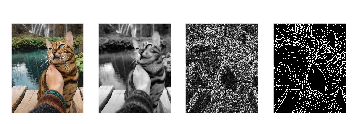

In [37]:
t = [ 'original' ,'grayed and medianed', 'laplace' , 'THreshold']
im = [ imgrgb, medianed, lapmed, th]
plot(t,im)

(570, 459, 3, 570, 459)


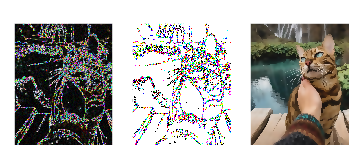

In [38]:
# generating a color painting and a cartoon

temp = cv2.bilateralFilter(imgrgb,9,7,9)
(Te,thr) = cv2.threshold(lapm,125,255,cv2.THRESH_BINARY_INV)
i = 8
while i != 0  :
    
        temp = cv2.bilateralFilter(temp,9,30,15)
        i = i-1
    
bilatrpt = temp
laplace =  np.uint8(np.absolute(cv2.Laplacian(bilatrpt,  cv2.CV_64F, ksize=5)))
(d, threshhold) = cv2.threshold(laplace,125,255,cv2.THRESH_BINARY_INV)

t = [ 'laplace for colored', 'thresholded', 'bilateral repeated']
im = [ laplace, threshhold ,bilatrpt ]
print(bilatrpt.shape + thr.shape)
plot(t,im)
# (570, 459, 3, 570, 459) cant do matrix operation on them


1032


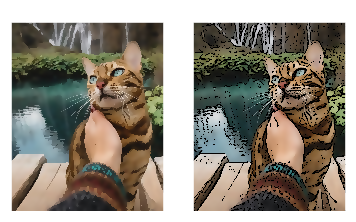

In [41]:
h,w,c= bilatrpt.shape
cartoon = bilatrpt.copy()
# print(h + w + c)
for i in range(h):  
    for j in range(w):
        if thr[i][j] == 0:
            cartoon[i][j] = (0,0,0)
            cartoon[i][j] = (0,0,0)
            cartoon[i][j] = (0,0,0)

t= [ 'c' , 'c']
im = [ bilatrpt , cartoon]
plot(t ,im)